# applying dorpout on classification problem

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from mlxtend.plotting import plot_decision_regions
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = np.array([[-1.58986e-01,  4.23977e-01],
       [-3.47926e-01,  4.70760e-01],
       [-5.04608e-01,  3.53801e-01],
       [-5.96774e-01,  1.14035e-01],
       [-5.18433e-01, -1.72515e-01],
       [-2.92627e-01, -2.07602e-01],
       [-1.58986e-01, -4.38596e-02],
       [-5.76037e-02,  1.43275e-01],
       [-7.14286e-02,  2.71930e-01],
       [-2.97235e-01,  3.47953e-01],
       [-4.17051e-01,  2.01754e-01],
       [-4.40092e-01,  8.77193e-03],
       [-3.24885e-01, -3.21637e-02],
       [-2.46544e-01,  5.55556e-02],
       [-2.18894e-01,  2.01754e-01],
       [-3.43318e-01,  1.60819e-01],
       [-5.09217e-01,  7.89474e-02],
       [-3.84793e-01, -9.06433e-02],
       [-1.49770e-01,  1.25731e-01],
       [-1.95853e-01,  3.24561e-01],
       [-3.91705e-02, -2.19298e-01],
       [-1.08295e-01, -3.01170e-01],
       [-1.86636e-01, -3.30409e-01],
       [-2.18894e-01, -4.23977e-01],
       [-8.06452e-02, -5.64327e-01],
       [ 6.68203e-02, -5.17544e-01],
       [ 9.44700e-02, -3.24561e-01],
       [ 1.86636e-01, -1.66667e-01],
       [ 6.22120e-02, -7.30994e-02],
       [ 2.07373e-02, -1.95906e-01],
       [ 2.99539e-02, -3.42105e-01],
       [-9.90783e-02, -3.77193e-01],
       [-6.91244e-03, -4.64912e-01],
       [ 1.31336e-01, -4.29825e-01],
       [ 2.32719e-01, -1.95906e-01],
       [ 8.52535e-02, -8.47953e-02],
       [-1.31336e-01, -2.36842e-01],
       [ 2.30415e-03, -1.25731e-01],
       [ 1.22120e-01, -2.92398e-03],
       [-3.47926e-01, -3.12865e-01],
       [-2.28111e-01, -1.25731e-01],
       [-7.60369e-02,  1.46199e-02],
       [ 4.37788e-02,  2.04678e-02],
       [ 1.15207e-02,  1.54971e-01],
       [-4.17051e-01, -1.60819e-01],
       [-3.15668e-01, -3.18713e-01],
       [ 1.26728e-01, -2.19298e-01],
       [ 2.05069e-01, -3.12865e-01],
       [ 2.18894e-01, -4.59064e-01],
       [ 7.14286e-02, -6.46199e-01],
       [-1.31336e-01, -6.05263e-01],
       [-2.09677e-01, -5.81871e-01],
       [-2.28111e-01, -4.29825e-01],
       [-1.45161e-01, -4.12281e-01],
       [-6.68203e-02, -4.82456e-01],
       [ 1.35945e-01, -5.11696e-01],
       [ 2.69585e-01, -4.06433e-01],
       [ 2.97235e-01, -2.95322e-01],
       [ 2.74194e-01, -1.72515e-01],
       [ 2.55760e-01, -4.97076e-02],
       [ 2.23502e-01, -4.97076e-02],
       [ 1.82028e-01, -8.47953e-02],
       [ 1.58986e-01, -1.54971e-01],
       [ 7.14286e-02, -2.13450e-01],
       [ 1.61290e-02, -2.66082e-01],
       [-2.53456e-02, -3.83041e-01],
       [-1.15207e-02, -4.82456e-01],
       [-2.30415e-03, -5.05848e-01],
       [ 2.53456e-02, -5.11696e-01],
       [ 2.53456e-02, -5.58480e-01],
       [ 1.15207e-02, -6.57895e-01],
       [-4.83871e-02, -6.46199e-01],
       [-8.52535e-02, -5.52632e-01],
       [-9.90783e-02, -5.00000e-01],
       [-1.61290e-02, -4.23977e-01],
       [ 1.31336e-01, -3.59649e-01],
       [ 2.23502e-01, -3.71345e-01],
       [ 2.92627e-01, -3.01170e-01],
       [ 2.60369e-01, -2.07602e-01],
       [ 2.00461e-01, -2.25146e-01],
       [ 1.72811e-01, -2.71930e-01],
       [-1.31336e-01,  9.06433e-02],
       [-1.49770e-01,  7.30994e-02],
       [-2.41935e-01,  6.14035e-02],
       [-3.01843e-01,  1.78363e-01],
       [-2.97235e-01,  1.95906e-01],
       [-2.74194e-01,  3.07018e-01],
       [-3.24885e-01,  2.95322e-01],
       [-3.98618e-01,  2.66082e-01],
       [-4.35484e-01,  1.60819e-01],
       [-4.72350e-01,  7.89474e-02],
       [-3.38710e-01,  4.38596e-02],
       [-2.69585e-01,  4.38596e-02],
       [-2.55760e-01,  1.02339e-01],
       [-1.68203e-01,  2.66082e-01],
       [-1.12903e-01,  3.01170e-01],
       [-3.91705e-02,  3.47953e-01],
       [-1.26728e-01,  4.41520e-01],
       [-2.32719e-01,  4.41520e-01],
       [-3.38710e-01,  4.18129e-01],
       [-4.12442e-01,  3.53801e-01],
       [-5.09217e-01,  2.19298e-01],
       [-5.41475e-01,  1.46199e-02],
       [-5.04608e-01, -1.25731e-01],
       [-4.90783e-01, -1.43275e-01],
       [-3.61751e-01, -1.37427e-01],
       [-2.69585e-01, -8.47953e-02],
       [-2.23502e-01, -7.89474e-02],
       [-1.86636e-01, -3.80117e-02],
       [-1.54378e-01, -8.77193e-03],
       [-1.12903e-01,  5.55556e-02],
       [-8.52535e-02,  1.37427e-01],
       [-8.52535e-02,  2.77778e-01],
       [-1.68203e-01,  3.01170e-01],
       [-1.91244e-01,  1.95906e-01],
       [-1.40553e-01, -4.97076e-02],
       [-2.99539e-02,  6.72515e-02],
       [-2.00461e-01, -2.30994e-01],
       [-1.08295e-01, -8.47953e-02],
       [ 3.45622e-02,  6.72515e-02],
       [ 8.06452e-02,  1.19883e-01],
       [-3.85369e-01,  3.30409e-02],
       [-3.81221e-01,  1.31287e-01],
       [-3.52189e-01,  2.58187e-01],
       [-3.54263e-01,  3.64620e-01],
       [-4.14401e-01, -6.92982e-02],
       [-4.99424e-01, -3.24561e-02],
       [-2.98272e-01, -9.79532e-02],
       [-3.16935e-01, -1.83918e-01],
       [-3.68779e-01, -2.90351e-01],
       [-3.56336e-01, -3.96784e-01],
       [-2.71313e-01,  4.38596e-03],
       [-1.77995e-01,  8.62573e-02],
       [-2.46429e-01,  1.43567e-01],
       [-2.50576e-01,  2.29532e-01],
       [-2.21544e-01,  3.76901e-01],
       [-2.15323e-01,  2.95029e-01],
       [-1.30300e-01,  2.17251e-01],
       [-2.07028e-01,  2.89474e-02],
       [-9.71198e-02,  2.13158e-01],
       [-3.90553e-02,  2.58187e-01],
       [ 1.90092e-02,  4.01462e-01],
       [-3.69816e-02,  4.21930e-01],
       [-6.39401e-02,  3.31871e-01],
       [-1.30300e-01,  3.76901e-01],
       [-3.75000e-01, -4.37719e-01],
       [-3.95737e-01, -3.51754e-01],
       [-3.54263e-01, -2.08480e-01],
       [-4.37212e-01, -3.76316e-01],
       [-4.80760e-01, -5.03216e-01],
       [-4.10253e-01, -4.66374e-01],
       [-2.48502e-01, -2.57602e-01],
       [-2.27765e-01, -3.14912e-01],
       [-2.83756e-01, -3.84503e-01],
       [-2.92051e-01, -4.54094e-01],
       [-3.37673e-01, -5.19591e-01],
       [-2.77535e-01, -5.48246e-01],
       [-2.07028e-01, -5.35965e-01],
       [-1.86290e-01, -4.78655e-01],
       [-1.32373e-01, -5.07310e-01],
       [-1.77995e-01, -2.98538e-01],
       [-1.65553e-01, -1.75731e-01],
       [-1.61406e-01, -1.26608e-01],
       [ 3.45622e-04,  2.58187e-01],
       [ 7.91475e-02,  3.56433e-01],
       [-2.66129e-02,  1.80409e-01],
       [-5.35714e-02,  7.80702e-02],
       [-1.41705e-02, -5.29240e-02],
       [-7.01613e-02, -1.63450e-01],
       [-6.39401e-02, -2.94444e-01],
       [-3.07604e-02, -4.66374e-01],
       [-5.77189e-02, -5.27778e-01],
       [-5.35714e-02, -3.96784e-01],
       [ 5.21889e-02, -4.17251e-01],
       [-1.62442e-02, -1.67544e-01],
       [-6.39401e-02, -8.56725e-02],
       [-6.18664e-02, -1.60819e-02],
       [-3.80184e-03,  4.38596e-03],
       [ 4.18203e-02,  2.04971e-01],
       [ 7.91475e-02,  1.92690e-01],
       [ 4.59677e-02,  2.54094e-01],
       [ 1.18548e-01,  1.92690e-01],
       [ 1.10253e-01,  8.62573e-02],
       [ 1.08180e-01, -6.92982e-02],
       [ 1.66244e-01, -2.42690e-02],
       [ 1.41359e-01,  6.57895e-02],
       [ 1.43433e-01,  1.68129e-01],
       [ 1.70392e-01,  1.92690e-01],
       [ 1.08180e-01,  2.99123e-01],
       [ 1.18548e-01,  3.19591e-01],
       [ 1.26843e-01,  3.93275e-01],
       [-8.67512e-02,  4.21930e-01],
       [-4.73502e-02,  5.07895e-01],
       [ 2.52304e-02,  5.20175e-01],
       [ 6.25576e-02,  5.52924e-01],
       [-5.87558e-03,  4.42398e-01],
       [-5.14977e-02,  5.73392e-01],
       [-8.05300e-02,  5.07895e-01],
       [-1.53111e-01,  5.52924e-01],
       [-1.11636e-01,  5.48830e-01],
       [-1.63479e-01,  4.91520e-01],
       [-2.52650e-01, -1.88012e-01],
       [-2.46429e-01, -3.65497e-02],
       [-3.21083e-01, -4.33626e-01],
       [-3.31452e-01, -6.05556e-01],
       [-3.85369e-01, -5.15497e-01],
       [-3.99885e-01, -6.21930e-01],
       [-1.24078e-01, -1.26608e-01],
       [-3.16935e-01, -2.28947e-01],
       [-2.94124e-01, -1.34795e-01],
       [-1.53111e-01,  1.84503e-01]])

In [3]:
y = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0.])

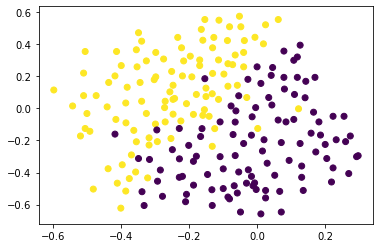

In [15]:
plt.scatter(X[:,0],X[:,-1],c=y)

In [25]:
model = Sequential()

model.add(Dense(128,input_dim = 2, activation ="relu"))
model.add(Dense(128,activation = "relu"))
model.add(Dense(1,activation = "sigmoid"))

adam = Adam(learning_rate=0.01)
model.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

history1 = model.fit(X,y, epochs = 500,validation_split=0.2,verbose =1 )

Epoch 1/500
6/6 [==============================] - 1s 60ms/step - loss: 0.5478 - accuracy: 0.7500 - val_loss: 0.6473 - val_accuracy: 0.6047
Epoch 2/500
6/6 [==============================] - 0s 10ms/step - loss: 0.2691 - accuracy: 0.8750 - val_loss: 0.5095 - val_accuracy: 0.7442
Epoch 3/500
6/6 [==============================] - 0s 12ms/step - loss: 0.2478 - accuracy: 0.9107 - val_loss: 0.3882 - val_accuracy: 0.8837
Epoch 4/500
6/6 [==============================] - 0s 10ms/step - loss: 0.2524 - accuracy: 0.9107 - val_loss: 0.4757 - val_accuracy: 0.8140
Epoch 5/500
6/6 [==============================] - 0s 10ms/step - loss: 0.2921 - accuracy: 0.8929 - val_loss: 0.4345 - val_accuracy: 0.7907
Epoch 6/500
6/6 [==============================] - 0s 12ms/step - loss: 0.2406 - accuracy: 0.9107 - val_loss: 0.4383 - val_accuracy: 0.8605
Epoch 7/500
6/6 [==============================] - 0s 12ms/step - loss: 0.2452 - accuracy: 0.8810 - val_loss: 0.3097 - val_accuracy: 0.9302
Epoch 8/500
6/6 [===

6/6 [==============================] - 0s 14ms/step - loss: 0.1489 - accuracy: 0.9286 - val_loss: 0.3940 - val_accuracy: 0.8605
Epoch 60/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1641 - accuracy: 0.9345 - val_loss: 0.3976 - val_accuracy: 0.8605
Epoch 61/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1579 - accuracy: 0.9524 - val_loss: 0.4463 - val_accuracy: 0.8837
Epoch 62/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1481 - accuracy: 0.9524 - val_loss: 0.4894 - val_accuracy: 0.8372
Epoch 63/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1519 - accuracy: 0.9405 - val_loss: 0.4485 - val_accuracy: 0.8372
Epoch 64/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1460 - accuracy: 0.9464 - val_loss: 0.3891 - val_accuracy: 0.8837
Epoch 65/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1428 - accuracy: 0.9524 - val_loss: 0.5424 - val_accuracy: 0.8372
Epoch 66/500
6/6 [========

6/6 [==============================] - 0s 12ms/step - loss: 0.1027 - accuracy: 0.9583 - val_loss: 0.5874 - val_accuracy: 0.8605
Epoch 118/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0995 - accuracy: 0.9583 - val_loss: 0.6210 - val_accuracy: 0.8605
Epoch 119/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1078 - accuracy: 0.9524 - val_loss: 0.6941 - val_accuracy: 0.8140
Epoch 120/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1015 - accuracy: 0.9583 - val_loss: 0.6215 - val_accuracy: 0.8605
Epoch 121/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1072 - accuracy: 0.9524 - val_loss: 0.6120 - val_accuracy: 0.8372
Epoch 122/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0994 - accuracy: 0.9643 - val_loss: 0.6750 - val_accuracy: 0.8372
Epoch 123/500
6/6 [==============================] - 0s 10ms/step - loss: 0.1204 - accuracy: 0.9464 - val_loss: 0.6885 - val_accuracy: 0.8372
Epoch 124/500
6/6 [=

Epoch 175/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1112 - accuracy: 0.9583 - val_loss: 0.7965 - val_accuracy: 0.8372
Epoch 176/500
6/6 [==============================] - 0s 15ms/step - loss: 0.0986 - accuracy: 0.9583 - val_loss: 0.8353 - val_accuracy: 0.8372
Epoch 177/500
6/6 [==============================] - 0s 15ms/step - loss: 0.0985 - accuracy: 0.9583 - val_loss: 0.9366 - val_accuracy: 0.8372
Epoch 178/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1047 - accuracy: 0.9524 - val_loss: 0.8682 - val_accuracy: 0.8372
Epoch 179/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0918 - accuracy: 0.9583 - val_loss: 0.8693 - val_accuracy: 0.8372
Epoch 180/500
6/6 [==============================] - 0s 10ms/step - loss: 0.1031 - accuracy: 0.9524 - val_loss: 0.9131 - val_accuracy: 0.8372
Epoch 181/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0927 - accuracy: 0.9524 - val_loss: 0.9894 - val_accuracy: 0.8372
Epoch 

Epoch 233/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0963 - accuracy: 0.9643 - val_loss: 1.2478 - val_accuracy: 0.8372
Epoch 234/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1116 - accuracy: 0.9524 - val_loss: 1.1334 - val_accuracy: 0.7907
Epoch 235/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0989 - accuracy: 0.9583 - val_loss: 1.2503 - val_accuracy: 0.8140
Epoch 236/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0894 - accuracy: 0.9583 - val_loss: 1.1894 - val_accuracy: 0.8372
Epoch 237/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1118 - accuracy: 0.9643 - val_loss: 1.0997 - val_accuracy: 0.8372
Epoch 238/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1221 - accuracy: 0.9583 - val_loss: 1.0259 - val_accuracy: 0.8372
Epoch 239/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0869 - accuracy: 0.9702 - val_loss: 1.1079 - val_accuracy: 0.8140
Epoch 

Epoch 291/500
6/6 [==============================] - 0s 9ms/step - loss: 0.0682 - accuracy: 0.9702 - val_loss: 1.5576 - val_accuracy: 0.8140
Epoch 292/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0600 - accuracy: 0.9702 - val_loss: 1.5746 - val_accuracy: 0.8140
Epoch 293/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0643 - accuracy: 0.9762 - val_loss: 1.5345 - val_accuracy: 0.8140
Epoch 294/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0621 - accuracy: 0.9762 - val_loss: 1.5167 - val_accuracy: 0.8372
Epoch 295/500
6/6 [==============================] - 0s 9ms/step - loss: 0.0677 - accuracy: 0.9702 - val_loss: 1.5478 - val_accuracy: 0.8140
Epoch 296/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0650 - accuracy: 0.9643 - val_loss: 1.5786 - val_accuracy: 0.8140
Epoch 297/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0651 - accuracy: 0.9762 - val_loss: 1.5049 - val_accuracy: 0.8372
Epoch 29

Epoch 349/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0527 - accuracy: 0.9762 - val_loss: 1.6527 - val_accuracy: 0.8372
Epoch 350/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0535 - accuracy: 0.9821 - val_loss: 1.6635 - val_accuracy: 0.8372
Epoch 351/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0509 - accuracy: 0.9821 - val_loss: 1.7647 - val_accuracy: 0.8140
Epoch 352/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0524 - accuracy: 0.9762 - val_loss: 1.7989 - val_accuracy: 0.8140
Epoch 353/500
6/6 [==============================] - 0s 15ms/step - loss: 0.0566 - accuracy: 0.9583 - val_loss: 1.7419 - val_accuracy: 0.8140
Epoch 354/500
6/6 [==============================] - 0s 15ms/step - loss: 0.0627 - accuracy: 0.9643 - val_loss: 1.8843 - val_accuracy: 0.8140
Epoch 355/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0512 - accuracy: 0.9702 - val_loss: 1.7863 - val_accuracy: 0.7907
Epoch 

Epoch 407/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0490 - accuracy: 0.9762 - val_loss: 2.0633 - val_accuracy: 0.8140
Epoch 408/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0468 - accuracy: 0.9762 - val_loss: 2.0341 - val_accuracy: 0.8140
Epoch 409/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0464 - accuracy: 0.9762 - val_loss: 1.9459 - val_accuracy: 0.8140
Epoch 410/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0455 - accuracy: 0.9881 - val_loss: 1.9165 - val_accuracy: 0.8140
Epoch 411/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0606 - accuracy: 0.9762 - val_loss: 1.8850 - val_accuracy: 0.8140
Epoch 412/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0499 - accuracy: 0.9821 - val_loss: 1.9563 - val_accuracy: 0.8605
Epoch 413/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0640 - accuracy: 0.9702 - val_loss: 1.9623 - val_accuracy: 0.8140
Epoch 

Epoch 465/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0416 - accuracy: 0.9881 - val_loss: 1.9771 - val_accuracy: 0.8140
Epoch 466/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0496 - accuracy: 0.9821 - val_loss: 2.1107 - val_accuracy: 0.7907
Epoch 467/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0497 - accuracy: 0.9702 - val_loss: 2.1119 - val_accuracy: 0.8372
Epoch 468/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0476 - accuracy: 0.9702 - val_loss: 1.7578 - val_accuracy: 0.8372
Epoch 469/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0520 - accuracy: 0.9881 - val_loss: 1.7664 - val_accuracy: 0.8372
Epoch 470/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0506 - accuracy: 0.9821 - val_loss: 1.9437 - val_accuracy: 0.8140
Epoch 471/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0417 - accuracy: 0.9821 - val_loss: 1.9465 - val_accuracy: 0.8140
Epoch 

In [31]:
model1 = Sequential()

model1.add(Dense(128, input_dim=2, activation="relu"))
model1.add(Dropout(0.2))
model1.add(Dense(128, activation="relu"))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model1.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
6/6 [==============================] - 1s 65ms/step - loss: 0.5517 - accuracy: 0.8095 - val_loss: 0.6153 - val_accuracy: 0.6279
Epoch 2/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2624 - accuracy: 0.8631 - val_loss: 0.6693 - val_accuracy: 0.6977
Epoch 3/500
6/6 [==============================] - 0s 12ms/step - loss: 0.3129 - accuracy: 0.8750 - val_loss: 0.4491 - val_accuracy: 0.7907
Epoch 4/500
6/6 [==============================] - 0s 12ms/step - loss: 0.3444 - accuracy: 0.8512 - val_loss: 0.3049 - val_accuracy: 0.8605
Epoch 5/500
6/6 [==============================] - 0s 12ms/step - loss: 0.2278 - accuracy: 0.9405 - val_loss: 0.3610 - val_accuracy: 0.8605
Epoch 6/500
6/6 [==============================] - 0s 13ms/step - loss: 0.2110 - accuracy: 0.9048 - val_loss: 0.3934 - val_accuracy: 0.7907
Epoch 7/500
6/6 [==============================] - 0s 13ms/step - loss: 0.2388 - accuracy: 0.9107 - val_loss: 0.4014 - val_accuracy: 0.8605
Epoch 8/500
6/6 [===

6/6 [==============================] - 0s 12ms/step - loss: 0.1557 - accuracy: 0.9464 - val_loss: 0.3873 - val_accuracy: 0.8837
Epoch 60/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1658 - accuracy: 0.9345 - val_loss: 0.4300 - val_accuracy: 0.8605
Epoch 61/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1611 - accuracy: 0.9286 - val_loss: 0.5199 - val_accuracy: 0.8372
Epoch 62/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1859 - accuracy: 0.9286 - val_loss: 0.5471 - val_accuracy: 0.8605
Epoch 63/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1722 - accuracy: 0.9345 - val_loss: 0.4366 - val_accuracy: 0.8372
Epoch 64/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1756 - accuracy: 0.9345 - val_loss: 0.3787 - val_accuracy: 0.9302
Epoch 65/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1656 - accuracy: 0.9345 - val_loss: 0.4594 - val_accuracy: 0.8372
Epoch 66/500
6/6 [========

6/6 [==============================] - 0s 23ms/step - loss: 0.1184 - accuracy: 0.9464 - val_loss: 0.7351 - val_accuracy: 0.8372
Epoch 118/500
6/6 [==============================] - 0s 15ms/step - loss: 0.1263 - accuracy: 0.9464 - val_loss: 0.7592 - val_accuracy: 0.8140
Epoch 119/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1331 - accuracy: 0.9405 - val_loss: 0.6840 - val_accuracy: 0.8372
Epoch 120/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1483 - accuracy: 0.9226 - val_loss: 0.6361 - val_accuracy: 0.8372
Epoch 121/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1163 - accuracy: 0.9524 - val_loss: 0.6998 - val_accuracy: 0.8372
Epoch 122/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1540 - accuracy: 0.9405 - val_loss: 0.6668 - val_accuracy: 0.8372
Epoch 123/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1376 - accuracy: 0.9405 - val_loss: 0.5423 - val_accuracy: 0.8372
Epoch 124/500
6/6 [=

Epoch 175/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1549 - accuracy: 0.9345 - val_loss: 0.7768 - val_accuracy: 0.8372
Epoch 176/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1194 - accuracy: 0.9583 - val_loss: 0.8831 - val_accuracy: 0.8605
Epoch 177/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1424 - accuracy: 0.9524 - val_loss: 0.9207 - val_accuracy: 0.8372
Epoch 178/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1141 - accuracy: 0.9405 - val_loss: 0.9194 - val_accuracy: 0.8372
Epoch 179/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1287 - accuracy: 0.9405 - val_loss: 0.7807 - val_accuracy: 0.8605
Epoch 180/500
6/6 [==============================] - 0s 10ms/step - loss: 0.1208 - accuracy: 0.9524 - val_loss: 0.9041 - val_accuracy: 0.8372
Epoch 181/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1644 - accuracy: 0.9107 - val_loss: 1.0560 - val_accuracy: 0.8140
Epoch 

Epoch 233/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1241 - accuracy: 0.9583 - val_loss: 0.8068 - val_accuracy: 0.8605
Epoch 234/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1505 - accuracy: 0.9345 - val_loss: 0.6761 - val_accuracy: 0.8372
Epoch 235/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1195 - accuracy: 0.9524 - val_loss: 0.5605 - val_accuracy: 0.9070
Epoch 236/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1846 - accuracy: 0.8988 - val_loss: 0.8161 - val_accuracy: 0.8140
Epoch 237/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1140 - accuracy: 0.9524 - val_loss: 1.2718 - val_accuracy: 0.7907
Epoch 238/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1420 - accuracy: 0.9167 - val_loss: 0.8132 - val_accuracy: 0.8372
Epoch 239/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1283 - accuracy: 0.9464 - val_loss: 0.5897 - val_accuracy: 0.8605
Epoch 

Epoch 291/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0811 - accuracy: 0.9583 - val_loss: 0.9188 - val_accuracy: 0.8372
Epoch 292/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1019 - accuracy: 0.9643 - val_loss: 1.1071 - val_accuracy: 0.7907
Epoch 293/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0759 - accuracy: 0.9821 - val_loss: 1.2877 - val_accuracy: 0.7907
Epoch 294/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1060 - accuracy: 0.9583 - val_loss: 1.0421 - val_accuracy: 0.7907
Epoch 295/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0852 - accuracy: 0.9583 - val_loss: 0.9218 - val_accuracy: 0.8837
Epoch 296/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0910 - accuracy: 0.9762 - val_loss: 0.9803 - val_accuracy: 0.8372
Epoch 297/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0982 - accuracy: 0.9643 - val_loss: 1.0625 - val_accuracy: 0.8140
Epoch 

Epoch 349/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0968 - accuracy: 0.9702 - val_loss: 0.9960 - val_accuracy: 0.8140
Epoch 350/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0858 - accuracy: 0.9524 - val_loss: 1.0607 - val_accuracy: 0.8372
Epoch 351/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0960 - accuracy: 0.9464 - val_loss: 1.6145 - val_accuracy: 0.8140
Epoch 352/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1018 - accuracy: 0.9524 - val_loss: 1.5749 - val_accuracy: 0.7442
Epoch 353/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1089 - accuracy: 0.9583 - val_loss: 1.8362 - val_accuracy: 0.7674
Epoch 354/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1273 - accuracy: 0.9583 - val_loss: 2.1461 - val_accuracy: 0.8372
Epoch 355/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0790 - accuracy: 0.9702 - val_loss: 1.9342 - val_accuracy: 0.8372
Epoch 

Epoch 407/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0765 - accuracy: 0.9643 - val_loss: 1.3984 - val_accuracy: 0.8140
Epoch 408/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0773 - accuracy: 0.9583 - val_loss: 1.3704 - val_accuracy: 0.8372
Epoch 409/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1185 - accuracy: 0.9464 - val_loss: 1.5912 - val_accuracy: 0.8140
Epoch 410/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1245 - accuracy: 0.9583 - val_loss: 1.2996 - val_accuracy: 0.8140
Epoch 411/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1482 - accuracy: 0.9583 - val_loss: 1.3237 - val_accuracy: 0.7674
Epoch 412/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0800 - accuracy: 0.9643 - val_loss: 1.1815 - val_accuracy: 0.7442
Epoch 413/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1203 - accuracy: 0.9226 - val_loss: 1.3766 - val_accuracy: 0.7209
Epoch 

Epoch 465/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0597 - accuracy: 0.9762 - val_loss: 1.4336 - val_accuracy: 0.7907
Epoch 466/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0735 - accuracy: 0.9583 - val_loss: 1.5560 - val_accuracy: 0.7674
Epoch 467/500
6/6 [==============================] - 0s 10ms/step - loss: 0.0778 - accuracy: 0.9583 - val_loss: 1.8704 - val_accuracy: 0.7907
Epoch 468/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1021 - accuracy: 0.9583 - val_loss: 1.8528 - val_accuracy: 0.7907
Epoch 469/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1007 - accuracy: 0.9583 - val_loss: 1.4168 - val_accuracy: 0.8372
Epoch 470/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1044 - accuracy: 0.9583 - val_loss: 1.6838 - val_accuracy: 0.8140
Epoch 471/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0876 - accuracy: 0.9643 - val_loss: 1.6123 - val_accuracy: 0.8140
Epoch 

In [32]:
model2 = Sequential()

model2.add(Dense(128, input_dim=2, activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(128, activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history3 = model2.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
6/6 [==============================] - 1s 68ms/step - loss: 0.5715 - accuracy: 0.7917 - val_loss: 0.6323 - val_accuracy: 0.5814
Epoch 2/500
6/6 [==============================] - 0s 12ms/step - loss: 0.2832 - accuracy: 0.8690 - val_loss: 0.8325 - val_accuracy: 0.6047
Epoch 3/500
6/6 [==============================] - 0s 12ms/step - loss: 0.2787 - accuracy: 0.8869 - val_loss: 0.6468 - val_accuracy: 0.7209
Epoch 4/500
6/6 [==============================] - 0s 13ms/step - loss: 0.3076 - accuracy: 0.8810 - val_loss: 0.4342 - val_accuracy: 0.7442
Epoch 5/500
6/6 [==============================] - 0s 12ms/step - loss: 0.2565 - accuracy: 0.8929 - val_loss: 0.3350 - val_accuracy: 0.9070
Epoch 6/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2361 - accuracy: 0.9167 - val_loss: 0.3559 - val_accuracy: 0.8605
Epoch 7/500
6/6 [==============================] - 0s 13ms/step - loss: 0.2836 - accuracy: 0.8869 - val_loss: 0.4117 - val_accuracy: 0.7907
Epoch 8/500
6/6 [===

6/6 [==============================] - 0s 16ms/step - loss: 0.2168 - accuracy: 0.8988 - val_loss: 0.3675 - val_accuracy: 0.8605
Epoch 60/500
6/6 [==============================] - 0s 15ms/step - loss: 0.1983 - accuracy: 0.9226 - val_loss: 0.3978 - val_accuracy: 0.8605
Epoch 61/500
6/6 [==============================] - 0s 15ms/step - loss: 0.2157 - accuracy: 0.9226 - val_loss: 0.4346 - val_accuracy: 0.8605
Epoch 62/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1973 - accuracy: 0.9286 - val_loss: 0.4000 - val_accuracy: 0.8605
Epoch 63/500
6/6 [==============================] - 0s 16ms/step - loss: 0.2384 - accuracy: 0.8988 - val_loss: 0.3866 - val_accuracy: 0.8605
Epoch 64/500
6/6 [==============================] - 0s 14ms/step - loss: 0.2080 - accuracy: 0.9226 - val_loss: 0.3749 - val_accuracy: 0.8605
Epoch 65/500
6/6 [==============================] - 0s 15ms/step - loss: 0.1992 - accuracy: 0.9286 - val_loss: 0.3859 - val_accuracy: 0.8605
Epoch 66/500
6/6 [========

6/6 [==============================] - 0s 14ms/step - loss: 0.1919 - accuracy: 0.9286 - val_loss: 0.4884 - val_accuracy: 0.8605
Epoch 118/500
6/6 [==============================] - 0s 13ms/step - loss: 0.2035 - accuracy: 0.9048 - val_loss: 0.5231 - val_accuracy: 0.8140
Epoch 119/500
6/6 [==============================] - 0s 14ms/step - loss: 0.2143 - accuracy: 0.9226 - val_loss: 0.4151 - val_accuracy: 0.8837
Epoch 120/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1949 - accuracy: 0.9167 - val_loss: 0.4285 - val_accuracy: 0.8837
Epoch 121/500
6/6 [==============================] - 0s 13ms/step - loss: 0.2142 - accuracy: 0.9286 - val_loss: 0.4164 - val_accuracy: 0.8837
Epoch 122/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2083 - accuracy: 0.9286 - val_loss: 0.4112 - val_accuracy: 0.8605
Epoch 123/500
6/6 [==============================] - 0s 12ms/step - loss: 0.2025 - accuracy: 0.9226 - val_loss: 0.4529 - val_accuracy: 0.8372
Epoch 124/500
6/6 [=

Epoch 175/500
6/6 [==============================] - 0s 15ms/step - loss: 0.1714 - accuracy: 0.9286 - val_loss: 0.6986 - val_accuracy: 0.8605
Epoch 176/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1585 - accuracy: 0.9345 - val_loss: 0.6335 - val_accuracy: 0.8605
Epoch 177/500
6/6 [==============================] - 0s 15ms/step - loss: 0.1606 - accuracy: 0.9345 - val_loss: 0.5328 - val_accuracy: 0.8837
Epoch 178/500
6/6 [==============================] - 0s 17ms/step - loss: 0.1823 - accuracy: 0.9286 - val_loss: 0.5208 - val_accuracy: 0.8372
Epoch 179/500
6/6 [==============================] - 0s 15ms/step - loss: 0.1762 - accuracy: 0.9286 - val_loss: 0.5525 - val_accuracy: 0.8605
Epoch 180/500
6/6 [==============================] - 0s 14ms/step - loss: 0.2057 - accuracy: 0.9226 - val_loss: 0.5506 - val_accuracy: 0.8605
Epoch 181/500
6/6 [==============================] - 0s 19ms/step - loss: 0.1909 - accuracy: 0.9345 - val_loss: 0.5159 - val_accuracy: 0.8605
Epoch 

Epoch 233/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1694 - accuracy: 0.9464 - val_loss: 0.5614 - val_accuracy: 0.8837
Epoch 234/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1529 - accuracy: 0.9345 - val_loss: 0.6943 - val_accuracy: 0.8605
Epoch 235/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1681 - accuracy: 0.9286 - val_loss: 0.6312 - val_accuracy: 0.8372
Epoch 236/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1775 - accuracy: 0.9226 - val_loss: 0.5814 - val_accuracy: 0.8605
Epoch 237/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2084 - accuracy: 0.9167 - val_loss: 0.6065 - val_accuracy: 0.8372
Epoch 238/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1617 - accuracy: 0.9405 - val_loss: 0.5698 - val_accuracy: 0.8372
Epoch 239/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1781 - accuracy: 0.9107 - val_loss: 0.5293 - val_accuracy: 0.8837
Epoch 

Epoch 291/500
6/6 [==============================] - 0s 17ms/step - loss: 0.1262 - accuracy: 0.9524 - val_loss: 0.6387 - val_accuracy: 0.8605
Epoch 292/500
6/6 [==============================] - 0s 17ms/step - loss: 0.1473 - accuracy: 0.9345 - val_loss: 0.6704 - val_accuracy: 0.8605
Epoch 293/500
6/6 [==============================] - 0s 15ms/step - loss: 0.1761 - accuracy: 0.9226 - val_loss: 0.7090 - val_accuracy: 0.8605
Epoch 294/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1453 - accuracy: 0.9286 - val_loss: 0.7359 - val_accuracy: 0.8605
Epoch 295/500
6/6 [==============================] - 0s 15ms/step - loss: 0.1523 - accuracy: 0.9226 - val_loss: 0.6863 - val_accuracy: 0.8605
Epoch 296/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1374 - accuracy: 0.9405 - val_loss: 0.7188 - val_accuracy: 0.8605
Epoch 297/500
6/6 [==============================] - 0s 15ms/step - loss: 0.1520 - accuracy: 0.9345 - val_loss: 0.7589 - val_accuracy: 0.8605
Epoch 

Epoch 349/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1425 - accuracy: 0.9405 - val_loss: 0.7250 - val_accuracy: 0.8605
Epoch 350/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1251 - accuracy: 0.9345 - val_loss: 0.6399 - val_accuracy: 0.8837
Epoch 351/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1775 - accuracy: 0.9286 - val_loss: 0.7360 - val_accuracy: 0.8605
Epoch 352/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1519 - accuracy: 0.9464 - val_loss: 0.6380 - val_accuracy: 0.8605
Epoch 353/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1616 - accuracy: 0.9345 - val_loss: 0.6129 - val_accuracy: 0.8605
Epoch 354/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1460 - accuracy: 0.9405 - val_loss: 0.5984 - val_accuracy: 0.8837
Epoch 355/500
6/6 [==============================] - 0s 13ms/step - loss: 0.2097 - accuracy: 0.9405 - val_loss: 0.6004 - val_accuracy: 0.8837
Epoch 

Epoch 407/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1469 - accuracy: 0.9345 - val_loss: 0.8370 - val_accuracy: 0.8605
Epoch 408/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1589 - accuracy: 0.9345 - val_loss: 1.0227 - val_accuracy: 0.8372
Epoch 409/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1495 - accuracy: 0.9405 - val_loss: 0.6709 - val_accuracy: 0.8837
Epoch 410/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1481 - accuracy: 0.9345 - val_loss: 0.5958 - val_accuracy: 0.8837
Epoch 411/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1559 - accuracy: 0.9345 - val_loss: 0.6050 - val_accuracy: 0.8837
Epoch 412/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1441 - accuracy: 0.9405 - val_loss: 0.6444 - val_accuracy: 0.8837
Epoch 413/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1305 - accuracy: 0.9345 - val_loss: 0.6959 - val_accuracy: 0.8837
Epoch 

Epoch 465/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1435 - accuracy: 0.9524 - val_loss: 1.1169 - val_accuracy: 0.8605
Epoch 466/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1339 - accuracy: 0.9583 - val_loss: 1.0663 - val_accuracy: 0.8605
Epoch 467/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1779 - accuracy: 0.9345 - val_loss: 1.0256 - val_accuracy: 0.8372
Epoch 468/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1242 - accuracy: 0.9464 - val_loss: 0.9990 - val_accuracy: 0.8372
Epoch 469/500
6/6 [==============================] - 0s 21ms/step - loss: 0.1590 - accuracy: 0.9226 - val_loss: 0.8867 - val_accuracy: 0.8605
Epoch 470/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1452 - accuracy: 0.9345 - val_loss: 0.8336 - val_accuracy: 0.8837
Epoch 471/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1607 - accuracy: 0.9405 - val_loss: 0.9394 - val_accuracy: 0.8605
Epoch 

### we can observe from the below results that when dropout is applied and given correct p value i.e dropout percentage we are able to get generalized model and reduce overfitting

3888/3888 [==============================] - 8s 2ms/step


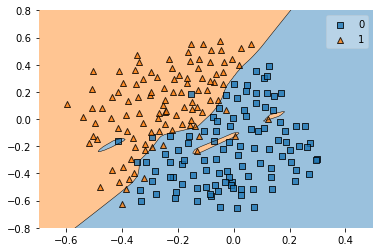

In [33]:
plot_decision_regions(X, y.astype('int'), clf=model)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.show()

3888/3888 [==============================] - 8s 2ms/step


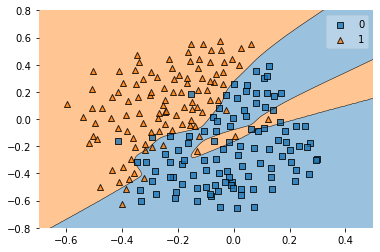

In [34]:
plot_decision_regions(X, y.astype('int'), clf=model1)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.show()

3888/3888 [==============================] - 8s 2ms/step


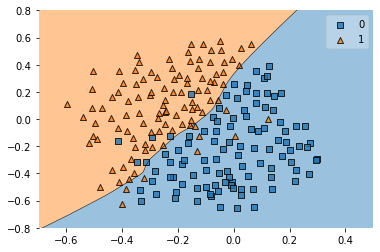

In [35]:
plot_decision_regions(X, y.astype('int'), clf=model2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.show()

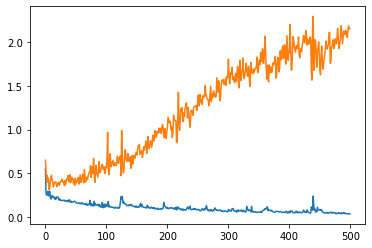

In [36]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

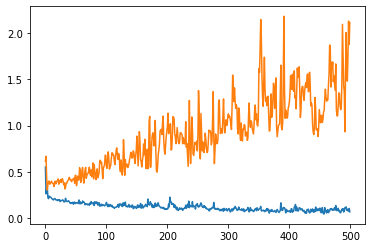

In [37]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

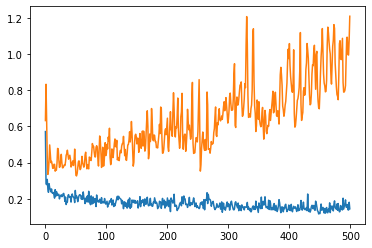

In [38]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

# Applying dropout on regression

In [42]:
X_train = np.linspace(-1, 1, 20)
X_train

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [41]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [43]:
X_test = np.linspace(-1, 1, 20)
X_test

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [44]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

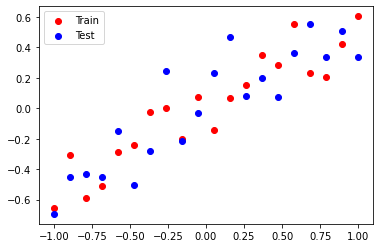

In [47]:
plt.scatter(X_train,y_train, c= 'red', label = "Train")
plt.scatter(X_test,y_test, c= 'blue', label = "Test")
plt.legend()

In [48]:
model_1 = Sequential()
model_1.add(Dense(128, input_dim=1, activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model_1.fit(X_train, y_train, epochs=500, 
                    validation_data = (X_test, y_test),
                    verbose=1)

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 0.0530 - mse: 0.0530 - val_loss: 0.0730 - val_mse: 0.0730
Epoch 2/500
1/1 [==============================] - 0s 43ms/step - loss: 0.0648 - mse: 0.0648 - val_loss: 0.0356 - val_mse: 0.0356
Epoch 3/500
1/1 [==============================] - 0s 45ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0405 - val_mse: 0.0405
Epoch 4/500
1/1 [==============================] - 0s 49ms/step - loss: 0.0274 - mse: 0.0274 - val_loss: 0.0469 - val_mse: 0.0469
Epoch 5/500
1/1 [==============================] - 0s 47ms/step - loss: 0.0334 - mse: 0.0334 - val_loss: 0.0408 - val_mse: 0.0408
Epoch 6/500
1/1 [==============================] - 0s 44ms/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0331 - val_mse: 0.0331
Epoch 7/500
1/1 [==============================] - 0s 42ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 8/500
1/1 [==============================] - 0s 41ms/step - loss: 0.0174 - mse: 0.0174

1/1 [==============================] - 0s 41ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0330 - val_mse: 0.0330
Epoch 64/500
1/1 [==============================] - 0s 47ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0332 - val_mse: 0.0332
Epoch 65/500
1/1 [==============================] - 0s 46ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0331 - val_mse: 0.0331
Epoch 66/500
1/1 [==============================] - 0s 49ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0329 - val_mse: 0.0329
Epoch 67/500
1/1 [==============================] - 0s 50ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0329 - val_mse: 0.0329
Epoch 68/500
1/1 [==============================] - 0s 53ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0331 - val_mse: 0.0331
Epoch 69/500
1/1 [==============================] - 0s 51ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0333 - val_mse: 0.0333
Epoch 70/500
1/1 [==============================] - 0s 43ms/step - loss: 0.0124 - mse: 0.0124 - 

1/1 [==============================] - 0s 37ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0370 - val_mse: 0.0370
Epoch 126/500
1/1 [==============================] - 0s 37ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0375 - val_mse: 0.0375
Epoch 127/500
1/1 [==============================] - 0s 38ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0376 - val_mse: 0.0376
Epoch 128/500
1/1 [==============================] - 0s 42ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0372 - val_mse: 0.0372
Epoch 129/500
1/1 [==============================] - 0s 38ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0374 - val_mse: 0.0374
Epoch 130/500
1/1 [==============================] - 0s 39ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0378 - val_mse: 0.0378
Epoch 131/500
1/1 [==============================] - 0s 49ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0382 - val_mse: 0.0382
Epoch 132/500
1/1 [==============================] - 0s 50ms/step - loss: 0.0094 - mse: 0.

1/1 [==============================] - 0s 49ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0434 - val_mse: 0.0434
Epoch 188/500
1/1 [==============================] - 0s 46ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0440 - val_mse: 0.0440
Epoch 189/500
1/1 [==============================] - 0s 46ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0444 - val_mse: 0.0444
Epoch 190/500
1/1 [==============================] - 0s 46ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0441 - val_mse: 0.0441
Epoch 191/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0437 - val_mse: 0.0437
Epoch 192/500
1/1 [==============================] - 0s 50ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0437 - val_mse: 0.0437
Epoch 193/500
1/1 [==============================] - 0s 45ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0441 - val_mse: 0.0441
Epoch 194/500
1/1 [==============================] - 0s 47ms/step - loss: 0.0064 - mse: 0.

1/1 [==============================] - 0s 45ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0455 - val_mse: 0.0455
Epoch 250/500
1/1 [==============================] - 0s 47ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0451 - val_mse: 0.0451
Epoch 251/500
1/1 [==============================] - 0s 49ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0458 - val_mse: 0.0458
Epoch 252/500
1/1 [==============================] - 0s 46ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0462 - val_mse: 0.0462
Epoch 253/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0473 - val_mse: 0.0473
Epoch 254/500
1/1 [==============================] - 0s 58ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0465 - val_mse: 0.0465
Epoch 255/500
1/1 [==============================] - 0s 37ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0462 - val_mse: 0.0462
Epoch 256/500
1/1 [==============================] - 0s 69ms/step - loss: 0.0053 - mse: 0.

1/1 [==============================] - 0s 43ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0456 - val_mse: 0.0456
Epoch 312/500
1/1 [==============================] - 0s 38ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0464 - val_mse: 0.0464
Epoch 313/500
1/1 [==============================] - 0s 42ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0465 - val_mse: 0.0465
Epoch 314/500
1/1 [==============================] - 0s 47ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0481 - val_mse: 0.0481
Epoch 315/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0494 - val_mse: 0.0494
Epoch 316/500
1/1 [==============================] - 0s 50ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0507 - val_mse: 0.0507
Epoch 317/500
1/1 [==============================] - 0s 49ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0489 - val_mse: 0.0489
Epoch 318/500
1/1 [==============================] - 0s 45ms/step - loss: 0.0082 - mse: 0.

1/1 [==============================] - 0s 46ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0461 - val_mse: 0.0461
Epoch 374/500
1/1 [==============================] - 0s 39ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0458 - val_mse: 0.0458
Epoch 375/500
1/1 [==============================] - 0s 46ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0462 - val_mse: 0.0462
Epoch 376/500
1/1 [==============================] - 0s 45ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0465 - val_mse: 0.0465
Epoch 377/500
1/1 [==============================] - 0s 41ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0465 - val_mse: 0.0465
Epoch 378/500
1/1 [==============================] - 0s 46ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0469 - val_mse: 0.0469
Epoch 379/500
1/1 [==============================] - 0s 49ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0466 - val_mse: 0.0466
Epoch 380/500
1/1 [==============================] - 0s 50ms/step - loss: 0.0038 - mse: 0.

1/1 [==============================] - 0s 47ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0459 - val_mse: 0.0459
Epoch 436/500
1/1 [==============================] - 0s 50ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0464 - val_mse: 0.0464
Epoch 437/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0463 - val_mse: 0.0463
Epoch 438/500
1/1 [==============================] - 0s 45ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0465 - val_mse: 0.0465
Epoch 439/500
1/1 [==============================] - 0s 44ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0474 - val_mse: 0.0474
Epoch 440/500
1/1 [==============================] - 0s 39ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0476 - val_mse: 0.0476
Epoch 441/500
1/1 [==============================] - 0s 50ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0490 - val_mse: 0.0490
Epoch 442/500
1/1 [==============================] - 0s 43ms/step - loss: 0.0036 - mse: 0.

1/1 [==============================] - 0s 55ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0474 - val_mse: 0.0474
Epoch 498/500
1/1 [==============================] - 0s 55ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0494 - val_mse: 0.0494
Epoch 499/500
1/1 [==============================] - 0s 57ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0481 - val_mse: 0.0481
Epoch 500/500
1/1 [==============================] - 0s 58ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0474 - val_mse: 0.0474


In [49]:
# evaluate the model
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.001835007220506668, Test: 0.047436170279979706


In [52]:
y_pred_1 = model_1.predict(X_test)

1/1 [==============================] - 0s 99ms/step


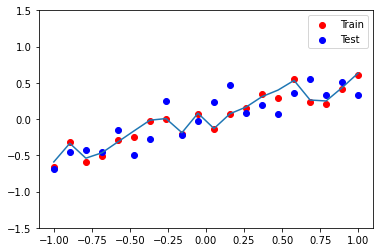

In [53]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

In [54]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, y_train, epochs=500, 
                               validation_data = (X_test, y_test),
                               verbose=False)

In [55]:
model_3 = Sequential()
model_3.add(Dense(128, input_dim=1, activation="relu"))
model_3.add(Dropout(0.5))
model_3.add(Dense(128, activation="relu"))
model_3.add(Dropout(0.5))
model_3.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history2 = model_3.fit(X_train, y_train, epochs=500, 
                               validation_data = (X_test, y_test),
                               verbose=False)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.